In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization

In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "2"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (4257, 75)
speed.shape: (4257, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

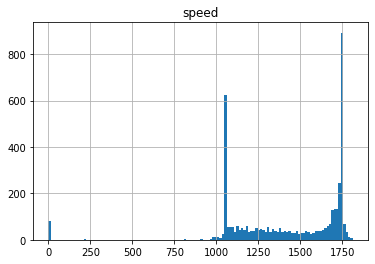

In [6]:
speed.hist(bins=128)

feature.shape: (4137, 75)
speed.shape: (4137, 1)


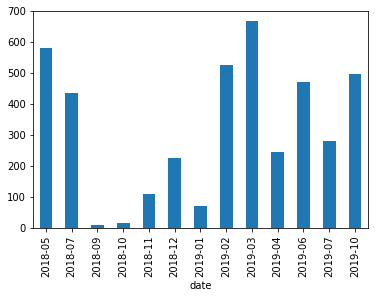

In [7]:
feature = feature[speed.speed >= 1000]
speed = speed[speed.speed >= 1000]

toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [8]:
# 划分train set, test set
feature_train = feature["2018-05": "2019-04"]
speed_train = speed["2018-05": "2019-04"]

feature_test = feature["2019-06": "2019-10"]
speed_test = speed["2019-06": "2019-10"]

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (2887, 75)
speed_train.shape: (2887, 1)
feature_test.shape: (1250, 75)
speed_test.shape: (1250, 1)


In [9]:
# 子工况空间

In [10]:
feature1 = feature_train[feature_train.index.isin(speed_train.query("speed >= 1000 & speed < 1250").index)]
feature2 = feature_train[feature_train.index.isin(speed_train.query("speed >= 1250 & speed < 1500").index)]
feature3 = feature_train[feature_train.index.isin(speed_train.query("speed >= 1500").index)]

toolkit.print_shape(feature1=feature1, feature2=feature2, feature3=feature3)

feature1.shape: (781, 75)
feature2.shape: (446, 75)
feature3.shape: (1660, 75)
